# STATS 765 Lab 2
Chase Robertson  
crob873  

## Task 1: Examine the Data

### Problems with the data
The ```simulation_outpu1_raw.xlsx``` file contains empty leading rows and columns, has some merged cells, occasionally contains a row with a group name like 'Sensible Cooling' that should apply to the following rows, and has some missing values.

### How to address the problems
I would address the challenges above by reorganising the excel file into a more strictly manageable format. I would start by removing the leading rows and columns. Then I would new columns for the climate type, simulation control group, building size, and building material. There is no need to address the missing values, as they suggest that we will simply not have any rows with both 'sensible heating' control group and 'large' office size.

## Task 2: Clean the data
First let's load the data using ```read_xlsx```

In [1]:
suppressPackageStartupMessages(library(tidyverse))

raw.df <- readxl::read_xlsx('simulation_outpu1_raw.xlsx', skip=7, col_names=F)
head(raw.df)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



...1,...2,...3,...4,...5,...6,...7,...8
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],0.000,0.000,0.010,0.010,0.000,0.000
NA,Cooling energy [GJ],47.070,47.350,639.270,639.450,5905.350,5909.970
NA,Total Cosumption [GJ],162.470,162.750,1792.780,1793.020,30489.440,30496.670
NA,Sensible Cooling,NA,NA,NA,NA,NA,NA
NA,Calculated Design Air Flow [m3/s],0.256,0.257,3.468,3.468,5.232,5.232
NA,User Design Air Flow [m3/s],0.308,0.309,3.468,3.468,5.232,5.232


Nice! ```read_xlsx``` took care of those empty columns automatically. Now let's name the columns something more sensible.

In [2]:
df <- raw.df
names(df) <- c("weather", "description",
               "small-concrete", "small-curtain_wall",
               "medium-concrete", "medium-curtain_wall",
               "large-concrete", "large-curtain_wall")
names(df)

[1] "weather"             "description"         "small-concrete"     
[4] "small-curtain_wall"  "medium-concrete"     "medium-curtain_wall"
[7] "large-concrete"      "large-curtain_wall"

In [3]:
x1 <- as.data.frame(matrix(rep(NA, length(df)), nrow=1))
names(x1) <- names(df)
df2 <- bind_rows(x1, df)
head(df2)

,weather,description,small-concrete,small-curtain_wall,medium-concrete,medium-curtain_wall,large-concrete,large-curtain_wall
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,NA,NA,NA,NA
2,"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],0.000,0.000,0.010,0.010,0.000,0.000
3,NA,Cooling energy [GJ],47.070,47.350,639.270,639.450,5905.350,5909.970
4,NA,Total Cosumption [GJ],162.470,162.750,1792.780,1793.020,30489.440,30496.670
5,NA,Sensible Cooling,NA,NA,NA,NA,NA,NA
6,NA,Calculated Design Air Flow [m3/s],0.256,0.257,3.468,3.468,5.232,5.232


Great, now we can create a new group column based on the 'Sensible XXXXing' grouping we see in the .xlsx file.

In [4]:
df2 <- df2 %>%
    mutate(group = ifelse(is.na(description), 'overall',
                     ifelse(description=='Sensible Cooling', 'sensible_cooling', 
                       ifelse(description=='Sensible Heating', 'sensible_heating', NA))))
df2$group

[1] "overall"          NA                 NA                
  [4] NA                 "sensible_cooling" NA                
  [7] NA                 NA                 NA                
 [10] NA                 NA                 NA                
 [13] "sensible_heating" NA                 NA                
 [16] NA                 NA                 NA                
 [19] NA                 NA                 "overall"         
 [22] NA                 NA                 NA                
 [25] "sensible_cooling" NA                 NA                
 [28] NA                 NA                 NA                
 [31] NA                 NA                 "sensible_heating"
 [34] NA                 NA                 NA                
 [37] NA                 NA                 NA                
 [40] NA                 "overall"          NA                
 [43] NA                 NA                 "sensible_cooling"
 [46] NA                 NA                 NA                
 [49] NA                 NA                 NA                
 [52] NA                 "sensible_heating" NA                
 [55] NA                 NA                 NA                
 [58] NA                 NA                 NA                
 [61] "overall"          NA                 NA                
 [64] NA                 "sensible_cooling" NA                
 [67] NA                 NA                 NA                
 [70] NA                 NA                 NA                
 [73] "sensible_heating" NA                 NA                
 [76] NA                 NA                 NA                
 [79] NA                 NA                 "overall"         
 [82] NA                 NA                 NA                
 [85] "sensible_cooling" NA                 NA                
 [88] NA                 NA                 NA                
 [91] NA                 NA                 "sensible_heating"
 [94] NA                 NA                 NA                
 [97] NA                 NA                 NA                
[100] NA                 "overall"          NA                
[103] NA                 NA                 "sensible_cooling"
[106] NA                 NA                 NA                
[109] NA                 NA                 NA                
[112] NA                 "sensible_heating" NA                
[115] NA                 NA                 NA                
[118] NA                 NA                 NA                
[121] "overall"          NA                 NA                
[124] NA                 "sensible_cooling" NA                
[127] NA                 NA                 NA                
[130] NA                 NA                 NA                
[133] "sensible_heating" NA                 NA                
[136] NA                 NA                 NA                
[139] NA                 NA                 "overall"         
[142] NA                 NA                 NA                
[145] "sensible_cooling" NA                 NA                
[148] NA                 NA                 NA                
[151] NA                 NA                 "sensible_heating"
[154] NA                 NA                 NA                
[157] NA                 NA                 NA                
[160] NA                 "overall"          NA                
[163] NA                 NA                 "sensible_cooling"
[166] NA                 NA                 NA                
[169] NA                 NA                 NA                
[172] NA                 "sensible_heating" NA                
[175] NA                 NA                 NA                
[178] NA                 NA                 NA

And now we can fill the group and weather column's ```NA```s using ```na.locf```.

In [5]:
suppressPackageStartupMessages(library(zoo))

group.vt <- zoo(df2$group)
df2$group <- na.locf(group.vt)
df2$group <- as.character(df2$group)

head(df2)

,weather,description,small-concrete,small-curtain_wall,medium-concrete,medium-curtain_wall,large-concrete,large-curtain_wall,group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,NA,NA,NA,NA,NA,NA,NA,NA,overall
2,"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],0.000,0.000,0.010,0.010,0.000,0.000,overall
3,NA,Cooling energy [GJ],47.070,47.350,639.270,639.450,5905.350,5909.970,overall
4,NA,Total Cosumption [GJ],162.470,162.750,1792.780,1793.020,30489.440,30496.670,overall
5,NA,Sensible Cooling,NA,NA,NA,NA,NA,NA,sensible_cooling
6,NA,Calculated Design Air Flow [m3/s],0.256,0.257,3.468,3.468,5.232,5.232,sensible_cooling


In [6]:
num_na_per_row.vt <- apply(df2, 1, function(x){
    sum(is.na(x))
})
num_na_per_row.vt

[1] 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3
 [38] 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3
 [75] 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1
[112] 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1
[149] 1 1 1 1 7 3 3 3 3 3 3 3 8 0 1 1 7 1 1 1 1 1 1 1 7 3 3 3 3 3 3 3

In [7]:
df2 <- df2[which(num_na_per_row.vt<7),]

In [8]:
weather.vt <- zoo(df2$weather)
df2$weather <- na.locf(weather.vt, na.rm=F)
df2$weather <- as.character(df2$weather)

Now finish up our cleaning by removing the leading row and group demarcation rows, and pivoting the office_size/office_type columns into their own two columns.

In [9]:
clean.df <- df2 %>%
    filter(!is.na(weather), !grepl('^Sensible', description)) %>%
    pivot_longer(3:8,
                names_to=c('office_size', 'office_type'),
                names_sep="-",
                values_to='value',
                values_transform=list(value=as.double),
                values_drop_na=T)

clean.df

weather,description,group,office_size,office_type,value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,small,concrete,0.000
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,small,curtain_wall,0.000
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,medium,concrete,0.010
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,medium,curtain_wall,0.010
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,large,concrete,0.000
"Very Hot Humid (Honolulu, HI)",Heating energy [GJ],overall,large,curtain_wall,0.000
"Very Hot Humid (Honolulu, HI)",Cooling energy [GJ],overall,small,concrete,47.070
"Very Hot Humid (Honolulu, HI)",Cooling energy [GJ],overall,small,curtain_wall,47.350
"Very Hot Humid (Honolulu, HI)",Cooling energy [GJ],overall,medium,concrete,639.270


## Task 3: Exploration using ```{ggplot2}```
### Question 1
For small office with sensible cooling in place, how does the outdoor temperature at peak load differ by weather? Does the pattern vary by office type?

### Analysis
First we filter down to the rows that apply to our question: only the `Outdoor Temperature at Peak Load` of small offices in the cooling group. 

In [10]:
library(ggplot2)
sm_cool <- clean.df %>%
    filter(office_size=='small', group=='sensible_cooling',
          grepl('Outdoor Temperature at Peak Load', description))

Then we can plot. I chose to plot on a barchart ordered by local climate, with different building materials colored, so that we can easily see at a glance how office type and weather affect our data.

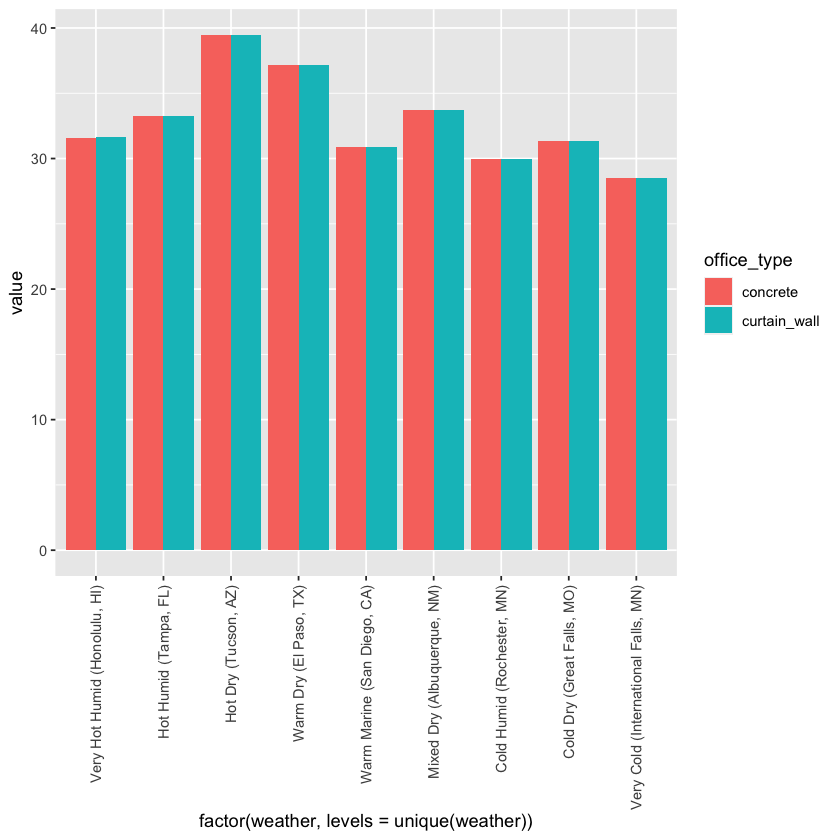

In [11]:
sm_cool %>%
    ggplot(aes(x=factor(weather, levels=unique(weather)),
               y=value, fill=office_type)) +
        geom_bar(position="dodge", stat="identity") +
        theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))

We see that the outdoor temperature at peak load differ greatly by climate, with drier and hotter climates hitting especially high maximums. We also see that the office type, or building material, does not have any significant difference.

### Question 2
Do any of these factors affect the total energy consumption: office_type; office_size and weather? If so, which one has the most significant impact?

### Analysis
First we filter down to rows that are relevant to the question at hand: those with a `Total Cosumption [GJ]` value.

In [12]:
consumption <- clean.df %>%
    filter(grepl('Total Cosumption', description))

Now we create a new chart to illuminate the most significant factors that affect total consumption.

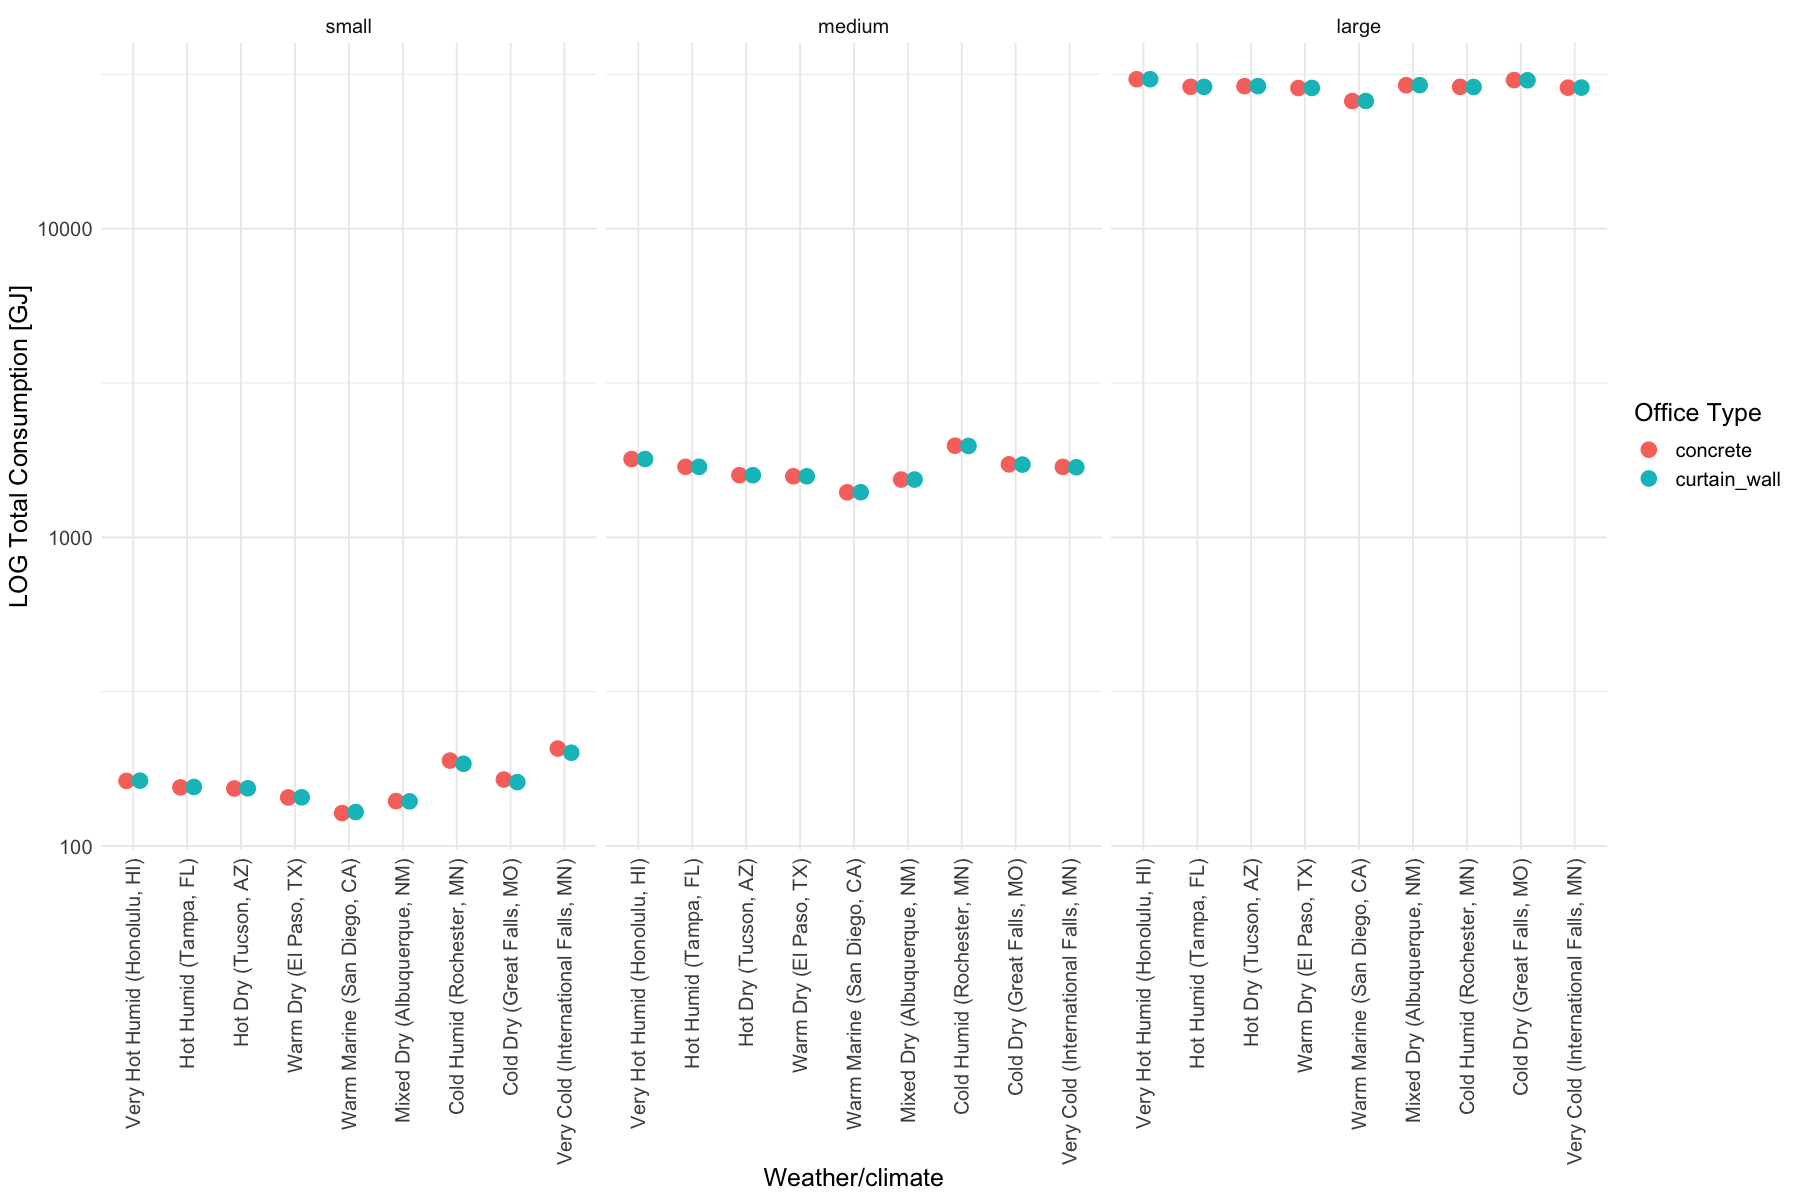

In [13]:
# make the plot wider
options(repr.plot.width=15, repr.plot.height=10)

ggplot(consumption,
       aes(x = factor(weather, levels = unique(weather)),
           y = value, colour = factor(office_type))) +
facet_wrap(~factor(office_size, levels = unique(office_size))) +
# put it on a logarithmic scale!
scale_y_continuous(trans='log10') + 
geom_point(size=4, position=position_dodge(0.5)) +
theme_minimal() +
theme(text = element_text(size=15),
      axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)) +
labs(x = 'Weather/climate',
    y = 'LOG Total Consumption [GJ]',
    colour = 'Office Type')

It can be seen that the most important factor which affects total energy consumption (by orders of magnitude!) is the size of the office. Please note that the y-axis is on a **logarithmic scale**. 
  
We see also that a combination of cold and humidity in an office's climate has a positive effect on consumption, with the relative effect being strongest on the smallest buildings. Conversely, offices in warm marine climates have the lowest consumption among offices of the same size.  
  
Building material does not have a notable impact on total consumption.

### EOF